##Instalaciones 

In [1515]:
!pip install umap-learn
!pip install scikit-learn-extra
!pip install mlxtend

In [1516]:
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler ,scale
import numpy as np
import seaborn as sns
import pandas as pd
# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt

#PCA
from sklearn.decomposition import PCA
#UMAP
import umap.umap_ as umap
#outliders tratar 
from sklearn.ensemble import IsolationForest
from numpy import sqrt, array, random, argsort

#clusterizacion 
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
#clustering jerárquico
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
#clustering densidad
from sklearn.cluster import dbscan
#clusitering vereificación 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#reglas de asociacion 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


## Nulos, renombrar, nuervas variables

In [1517]:
#abrimos los excel
df_1=pd.read_csv("marketing_campaign_1.csv", ";")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only



In [1518]:
df_1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [1519]:
#renombramos PhD=5  Master=4  Graduation=3  2n Cycle=2 Basic=1	
#simplificamos en con edución superio=2 , normal=1 y basica =0 
df_1['Education']=df_1['Education'].map({"PhD":2,"Master":1 ,"Graduation":1, "2n Cycle":1, "Basic":0})

In [1520]:
np.unique(df_1['Kidhome'])

array([0, 1, 2])

In [1521]:
#renombramos "Absurd" =6"YOLO"=6,"Widow"=5 Divorced=4  Married=3  Together=2 Single=1	Alone=1
#single y alone los pongo igual que son lo mismo 
#Absurd y YOLO los pongo igual por que  en el fondo son lo mismo anarquia relacional
df_1['Marital_Status']=df_1['Marital_Status'].replace({"Absurd":6,"YOLO":6,"Widow":5,"Divorced":4 ,"Married":3, "Together":2, "Single":1,"Alone":1})

In [1522]:
#funcion combierte la fecha de alta del cliente en numero de años en la base de datos 
def combersion_años(x):
   h=x[:4]
   h=int(h)
   anho= 2022-h
   return anho  

In [1523]:
#Cambiamos Dt_Customer por años de antiguedad en el crm 
#df_1=df_1.assign(antiguedad_cliente_en_crm = lambda dataset: combersion_años(dataset.Dt_Customer))
df_1=df_1.assign(antiguedad_cliente_en_crm = lambda dataset: dataset.Dt_Customer.apply( lambda dataset : combersion_años(dataset)))

In [1524]:
#nos cargamos id por que molesta 
df_1=df_1.drop(["ID","Dt_Customer"], axis=1)

In [1525]:
#miramos los nulos
df_1.isnull().values.any()

True

In [1526]:
df_1.isnull().sum()

Year_Birth                    0
Education                     0
Marital_Status                0
Income                       24
Kidhome                       0
Teenhome                      0
Recency                       0
MntWines                      0
MntFruits                     0
MntMeatProducts               0
MntFishProducts               0
MntSweetProducts              0
MntGoldProds                  0
NumDealsPurchases             0
NumWebPurchases               0
NumCatalogPurchases           0
NumStorePurchases             0
NumWebVisitsMonth             0
AcceptedCmp3                  0
AcceptedCmp4                  0
AcceptedCmp5                  0
AcceptedCmp1                  0
AcceptedCmp2                  0
Complain                      0
Z_CostContact                 0
Z_Revenue                     0
Response                      0
antiguedad_cliente_en_crm     0
dtype: int64

In [1527]:
#los rellenamos con la media del income
df_1 = df_1.fillna(df_1.mean())

In [1528]:
df_1.isnull().values.any()

False

In [1529]:
# variables

#AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
#Complain - 1 if customer complained in the last 2 years
#DtCustomer - date of customer’s enrolment with the company
#Education - customer’s level of education
#Marital - customer’s marital status
#Kidhome - number of small children in customer’s household
#Teenhome - number of teenagers in customer’s household
#Income - customer’s yearly household income
#MntFishProducts - amount spent on fish products in the last 2 years
#MntMeatProducts - amount spent on meat products in the last 2 years
#MntFruits - amount spent on fruits products in the last 2 years
#MntSweetProducts - amount spent on sweet products in the last 2 years
#MntWines - amount spent on wine products in the last 2 years
#MntGoldProds - amount spent on gold products in the last 2 years
#NumDealsPurchases - number of purchases made with discount
#NumCatalogPurchases - number of purchases made using catalogue
#NumStorePurchases - number of purchases made directly in stores
#NumWebPurchases - number of purchases made through company’s web site
#NumWebVisitsMonth - number of visits to company’s web site in the last month
#Recency - number of days since the last purchase

In [1530]:
#Variable Age en sustitución de la variable Year_birth
df_v=df_1.assign(Age = lambda dataset: 2022-dataset.Year_Birth)
df_v=df_v.drop(columns=["Year_Birth"],axis=1)
#compras cosas de adultos compras Mnt_adult_prod = MntGoldProds + MntWines
df_v=df_v.assign(Mnt_adult_prod = lambda dataset: dataset.MntGoldProds + dataset.MntWines)
#Variable Marital_Status para agrupar los diferentes estados civiles en sólo 2 categorías 
#Variable Children como el número total de niños en el hogar
df_v=df_v.assign(Children_numero_total = lambda dataset: dataset.Kidhome + dataset.Teenhome)
# renombramos la columna 
df_v = df_v.rename(columns={'NumCatalogPurchases':'numero_compras_en_descuento',
                            'Recency':'Dias_desde_ultima_compra',
                            "MntWines":"Mnt_Wine",
                            "Response":"aceptó_oferta_última_campaña",
                            "Income":"ingresos_anuales_hogar",
                            "NumDealsPurchases":"compras_en_descuento",
                            "NumWebPurchases":"compras_sitio_web",
                            "NumStorePurchases":"compras_tienda_fisica",
                            "NumCatalogPurchases":"compras_catalogo",
                            })

In [1531]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Education                     2240 non-null   int64  
 1   Marital_Status                2240 non-null   int64  
 2   ingresos_anuales_hogar        2240 non-null   float64
 3   Kidhome                       2240 non-null   int64  
 4   Teenhome                      2240 non-null   int64  
 5   Dias_desde_ultima_compra      2240 non-null   int64  
 6   Mnt_Wine                      2240 non-null   int64  
 7   MntFruits                     2240 non-null   int64  
 8   MntMeatProducts               2240 non-null   int64  
 9   MntFishProducts               2240 non-null   int64  
 10  MntSweetProducts              2240 non-null   int64  
 11  MntGoldProds                  2240 non-null   int64  
 12  compras_en_descuento          2240 non-null   int64  
 13  com

##Limpieza de outlillers

In [1532]:
#tratamos aoulider por categoria 
df_outliders=df_v
df_outliders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Education                     2240 non-null   int64  
 1   Marital_Status                2240 non-null   int64  
 2   ingresos_anuales_hogar        2240 non-null   float64
 3   Kidhome                       2240 non-null   int64  
 4   Teenhome                      2240 non-null   int64  
 5   Dias_desde_ultima_compra      2240 non-null   int64  
 6   Mnt_Wine                      2240 non-null   int64  
 7   MntFruits                     2240 non-null   int64  
 8   MntMeatProducts               2240 non-null   int64  
 9   MntFishProducts               2240 non-null   int64  
 10  MntSweetProducts              2240 non-null   int64  
 11  MntGoldProds                  2240 non-null   int64  
 12  compras_en_descuento          2240 non-null   int64  
 13  com

In [1533]:
#tras plotear todas las variables con un diagrama de caja hemos decidido eliminar las sigueintes filas por que las consideramos outliders  
#existen algunos outlider que hemos decidido dejar dado que consideramos que aunque diferntes no son tan diferentes del resto y eliminarlos puede suponer eliminar informacion sobre un mini cluster muy valiosa

In [1534]:
#me cargo de 500000 para arriba 
mas_de_500000 = df_outliders['ingresos_anuales_hogar'] >= 140000
df_outliders[mas_de_500000]
df_outliders=df_outliders.drop([2233,2132,1300,617,655],axis=0)


In [1535]:
#me cargo las filas de mas de 100 años son errores
mas_de_100 = df_outliders['Age'] >= 100
df_outliders[mas_de_100]
df_outliders=df_outliders.drop([339,192,239],axis=0)

In [1536]:
#me cargo de 1500 para arriba 
borrar = df_outliders['MntMeatProducts'] >= 1500
df_outliders[borrar]
df_outliders=df_outliders.drop([21,164,687,1653,2228],axis=0)


In [1537]:
#me cargo de 200 para arriba 
borrar = df_outliders['MntSweetProducts'] >= 200
df_outliders[borrar]
df_outliders=df_outliders.drop([27,1898],axis=0)

In [1538]:
#me cargo de 250 para arriba 
borrar = df_outliders['MntGoldProds'] >= 250
df_outliders[borrar]
df_outliders=df_outliders.drop([1328	,1806,1975],axis=0)

In [1539]:
#me cargo de 12 para arriba 
borrar = df_outliders['compras_en_descuento'] >= 12
df_outliders[borrar]
df_outliders=df_outliders.drop([90,287,432,1042,1147,1161,1245,1503,1525,1788,1846],axis=0)

In [1540]:
#me cargo de 12 para arriba 
borrar = df_outliders['NumWebVisitsMonth'] >= 10
df_outliders[borrar]
df_outliders=df_outliders.drop([9,47,605,774,981,1524,1868,2214],axis=0)

In [1541]:
#sns.boxplot(df_outliders["Education"])                      # todo bien 

In [1542]:
#sns.boxplot(df_outliders["Marital_Status"])              #todo bien          

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



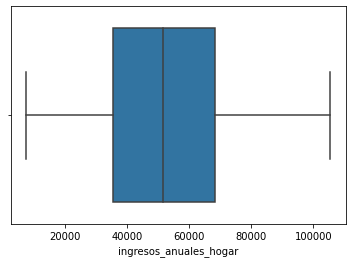

In [1543]:
sns.boxplot(df_outliders["ingresos_anuales_hogar"])                     

(array([ 72., 211., 315., 344., 322., 322., 307., 234.,  67.,   9.]),
 array([  7500. ,  17297.1,  27094.2,  36891.3,  46688.4,  56485.5,
         66282.6,  76079.7,  85876.8,  95673.9, 105471. ]),
 <a list of 10 Patch objects>)

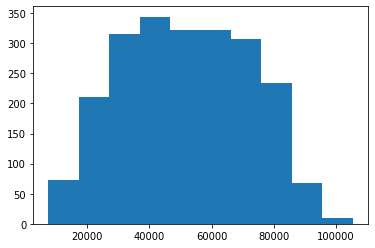

In [1544]:
plt.hist(df_outliders["ingresos_anuales_hogar"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



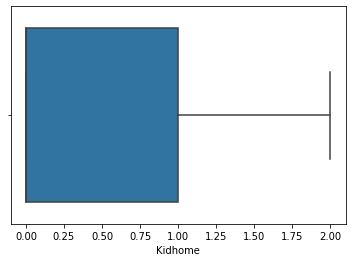

In [1545]:
sns.boxplot(df_outliders["Kidhome"])                      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



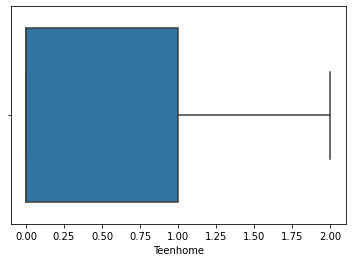

In [1546]:
sns.boxplot(df_outliders["Teenhome"])                    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



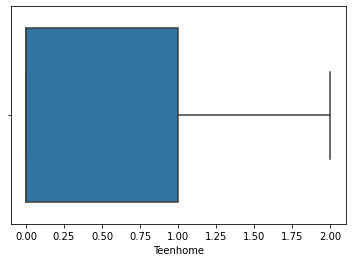

In [1547]:
sns.boxplot(df_outliders["Teenhome"])                   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



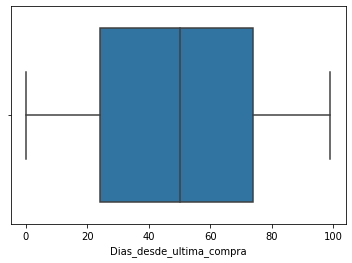

In [1548]:
sns.boxplot(df_outliders["Dias_desde_ultima_compra"])                 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



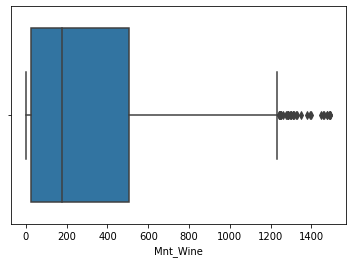

In [1549]:
sns.boxplot(df_outliders["Mnt_Wine"])                     

(array([1018.,  322.,  232.,  205.,  141.,   98.,   98.,   45.,   31.,
          13.]),
 array([   0. ,  149.3,  298.6,  447.9,  597.2,  746.5,  895.8, 1045.1,
        1194.4, 1343.7, 1493. ]),
 <a list of 10 Patch objects>)

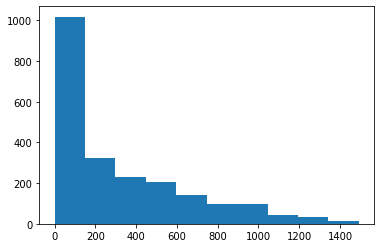

In [1550]:
plt.hist(df_outliders["Mnt_Wine"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



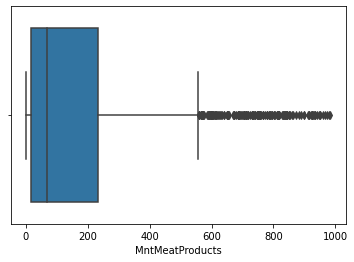

In [1551]:
sns.boxplot(df_outliders["MntMeatProducts"])                     

(array([1262.,  315.,  182.,  108.,  112.,   75.,   42.,   48.,   36.,
          23.]),
 array([  0. ,  98.4, 196.8, 295.2, 393.6, 492. , 590.4, 688.8, 787.2,
        885.6, 984. ]),
 <a list of 10 Patch objects>)

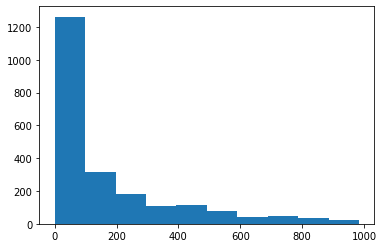

In [1552]:
plt.hist(df_outliders["MntMeatProducts"])                     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



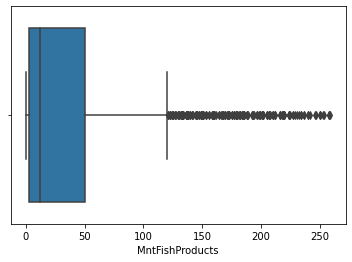

In [1553]:
sns.boxplot(df_outliders["MntFishProducts"])                     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



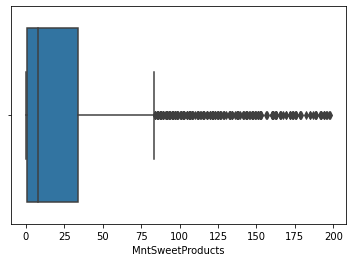

In [1554]:
sns.boxplot(df_outliders["MntSweetProducts"]) 
                      

(array([1430.,  280.,  154.,   85.,   76.,   52.,   46.,   32.,   29.,
          19.]),
 array([  0. ,  19.8,  39.6,  59.4,  79.2,  99. , 118.8, 138.6, 158.4,
        178.2, 198. ]),
 <a list of 10 Patch objects>)

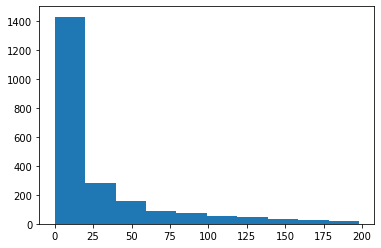

In [1555]:
plt.hist(df_outliders["MntSweetProducts"])   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



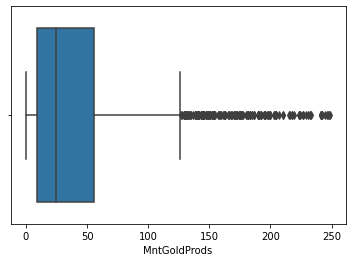

In [1556]:
sns.boxplot(df_outliders["MntGoldProds"])                     

(array([1101.,  481.,  186.,  140.,   83.,   74.,   54.,   42.,   21.,
          21.]),
 array([  0. ,  24.9,  49.8,  74.7,  99.6, 124.5, 149.4, 174.3, 199.2,
        224.1, 249. ]),
 <a list of 10 Patch objects>)

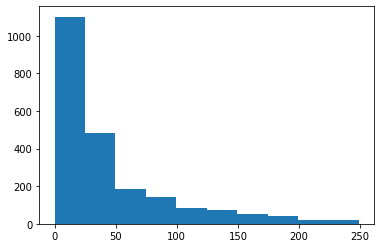

In [1557]:
plt.hist(df_outliders["MntGoldProds"])   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



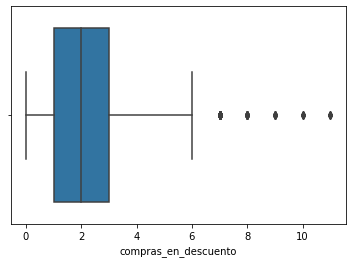

In [1558]:
sns.boxplot(df_outliders["compras_en_descuento"])                     

(array([996., 497., 297., 186.,  94.,  61.,  40.,  14.,   8.,  10.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

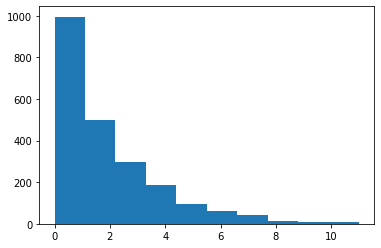

In [1559]:
plt.hist(df_outliders["compras_en_descuento"])   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



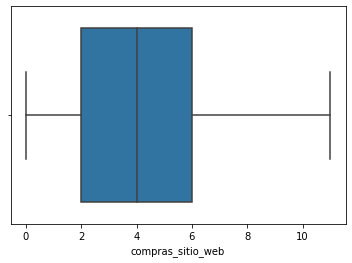

In [1560]:
sns.boxplot(df_outliders["compras_sitio_web"])                     

(array([384., 370., 335., 279., 219., 204., 153., 101.,  71.,  87.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

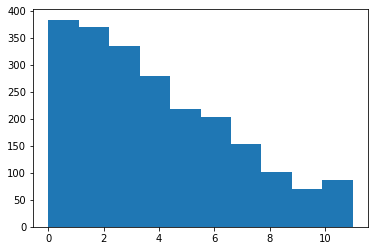

In [1561]:
plt.hist(df_outliders["compras_sitio_web"])   

In [1562]:
#se fue al cargarme algun outlaller en otra columna

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



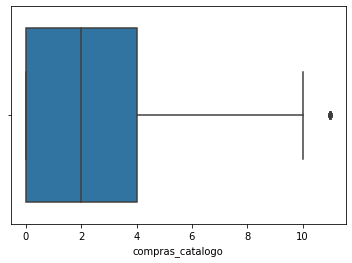

In [1563]:
sns.boxplot(df_outliders["compras_catalogo"])                     

(array([1059.,  270.,  184.,  181.,  140.,  126.,   79.,   55.,   42.,
          67.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

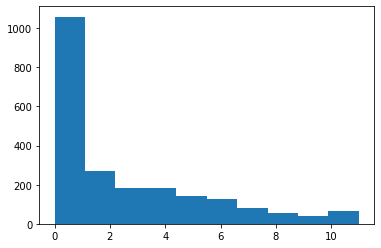

In [1564]:
plt.hist(df_outliders["compras_catalogo"])   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



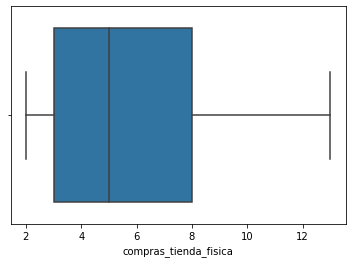

In [1565]:
sns.boxplot(df_outliders["compras_tienda_fisica"]) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



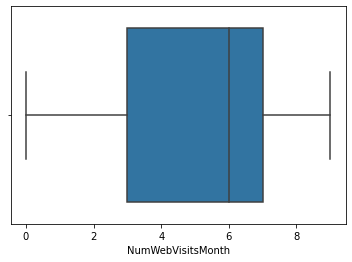

In [1566]:
sns.boxplot(df_outliders["NumWebVisitsMonth"]) 

(array([  5., 145., 202., 205., 217., 279., 339., 391., 338.,  82.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

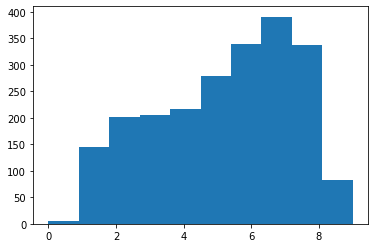

In [1567]:
plt.hist(df_outliders["NumWebVisitsMonth"])   

In [1568]:
#sns.boxplot(df_outliders["AcceptedCmp1"])                                      # todo bien 

In [1569]:
  #sns.boxplot(df_outliders["AcceptedCmp2"])                                       # todo bien 

In [1570]:
#sns.boxplot(df_outliders["AcceptedCmp3"])                                       # todo bien 

In [1571]:
#sns.boxplot(df_outliders["AcceptedCmp4"])                                       # todo bien 

In [1572]:
#sns.boxplot(df_outliders["AcceptedCmp5"])                                       # todo bien 

In [1573]:
#sns.boxplot(df_outliders["Complain"])                                       # todo bien 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



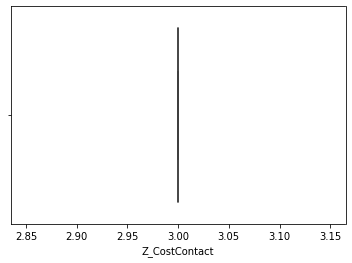

In [1574]:
sns.boxplot(df_outliders["Z_CostContact"]) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



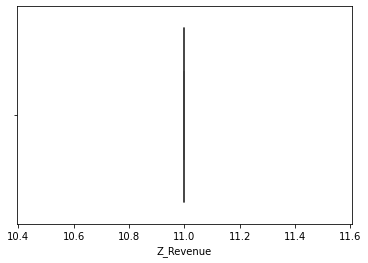

In [1575]:
sns.boxplot(df_outliders["Z_Revenue"]) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



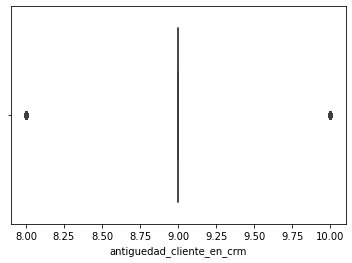

In [1576]:
sns.boxplot(df_outliders["antiguedad_cliente_en_crm"])   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



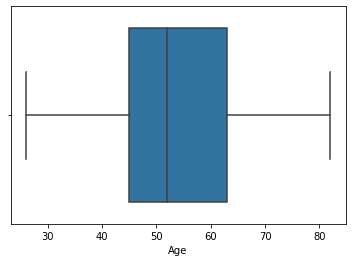

In [1577]:
sns.boxplot(df_outliders["Age"])       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



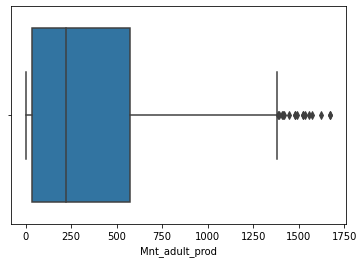

In [1578]:
sns.boxplot(df_outliders["Mnt_adult_prod"]) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



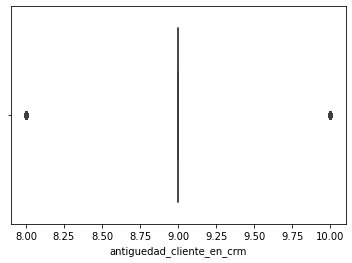

In [1579]:
sns.boxplot(df_outliders["antiguedad_cliente_en_crm"])       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



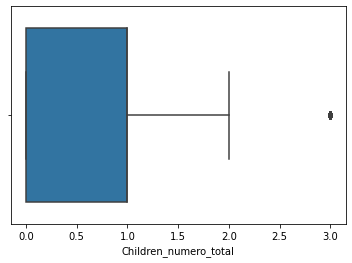

In [1580]:
sns.boxplot(df_outliders["Children_numero_total"])           

(array([ 627.,    0.,    0., 1114.,    0.,    0.,  410.,    0.,    0.,
          52.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

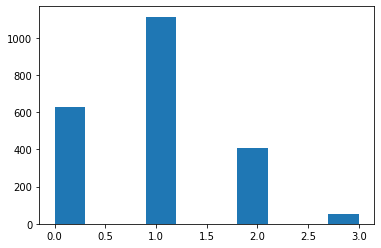

In [1581]:
plt.hist(df_outliders["Children_numero_total"])   

##Tratamiendo outliders con algoritmos 

In [1582]:
#ESTANDARIZAR LAS VARIABLES 
scaler = StandardScaler()
scaler.fit(df_outliders)
scaled_features = scaler.transform(df_outliders)
df_outliders_stan= pd.DataFrame(scaled_features, columns = df_outliders.columns)
df_outliders_stan

,Education,Marital_Status,ingresos_anuales_hogar,Kidhome,Teenhome,Dias_desde_ultima_compra,Mnt_Wine,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,aceptó_oferta_última_campaña,antiguedad_cliente_en_crm,Age,Mnt_adult_prod,Children_numero_total
0,-0.423518,-1.409226,0.308104,-0.821969,-0.930712,0.304618,0.972710,1.539149,1.768112,2.452351,...,-0.264456,-0.117498,-0.095717,0.0,0.0,2.369729,1.507714,1.015334,1.032212,-1.264933
1,-0.423518,-1.409226,-0.271013,1.037167,0.906527,-0.387603,-0.875547,-0.640428,-0.737706,-0.654904,...,-0.264456,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,1.271591,-0.923246,1.401716
2,-0.423518,-0.464165,0.969763,-0.821969,-0.930712,-0.802935,0.353662,0.562097,-0.176217,1.337395,...,-0.264456,-0.117498,-0.095717,0.0,0.0,-0.421989,0.044501,0.331982,0.325920,-1.264933
3,-0.423518,-0.464165,-1.238237,1.037167,-0.930712,-0.802935,-0.875547,-0.565270,-0.672741,-0.508680,...,-0.264456,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,-1.290978,-0.926016,0.068391
4,1.792657,0.480896,0.315715,1.037167,-0.930712,1.550615,-0.395711,0.411782,-0.217981,0.149327,...,-0.264456,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,-1.034721,-0.449616,0.068391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,-0.423518,0.480896,0.459586,-0.821969,0.906527,-0.110714,1.191894,0.411782,0.079005,0.076215,...,-0.264456,-0.117498,-0.095717,0.0,0.0,-0.421989,0.044501,0.161144,1.677568,0.068391
2199,1.792657,-0.464165,0.596632,2.896303,0.906527,0.235396,0.294423,-0.665481,-0.626337,-0.691460,...,3.781350,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,1.954943,0.176353,2.735040
2200,-0.423518,1.425957,0.251293,-0.821969,-0.930712,1.446781,1.781322,0.537045,0.241419,-0.106565,...,-0.264456,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,-1.034721,1.611094,-1.264933
2201,-0.423518,-0.464165,0.853488,-0.821969,0.906527,-1.425933,0.359586,0.086098,0.227498,0.770778,...,-0.264456,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,1.100753,0.384085,0.068391


In [1583]:
#isolation forest outliders

In [1584]:
"""isolation_forest = IsolationForest(n_estimators=100,contamination=float(0.5))
model=isolation_forest.fit(df_outliders_stan)
#buscamos outliders 
anomaly_sco=model.decision_function(df_outliders_stan)
outl=model.predict(df_outliders_stan)

df_outliders_stan['anomaly']= outl
df_outliders_stan['scores'] = anomaly_sco
#con oulellers 
con_outlider=df_outliders_stan['anomaly']==1
outlider = df_outliders_stan[con_outlider]
#sin outlallers
sin_outlider=df_outliders_stan['anomaly']==-1
df_limpio_iso_stan=df_outliders_stan[sin_outlider]
df_limpio_iso_stan"""

#isolation forest ha marcado 1102 valores como outliders es desproporcionado por lo que no usaremnos este metodo para la detection de oulidrs

"isolation_forest = IsolationForest(n_estimators=100,contamination=float(0.5))\nmodel=isolation_forest.fit(df_outliders_stan)\n#buscamos outliders \nanomaly_sco=model.decision_function(df_outliders_stan)\noutl=model.predict(df_outliders_stan)\n\ndf_outliders_stan['anomaly']= outl\ndf_outliders_stan['scores'] = anomaly_sco\n#con oulellers \ncon_outlider=df_outliders_stan['anomaly']==1\noutlider = df_outliders_stan[con_outlider]\n#sin outlallers\nsin_outlider=df_outliders_stan['anomaly']==-1\ndf_limpio_iso_stan=df_outliders_stan[sin_outlider]\ndf_limpio_iso_stan"

In [1585]:
#Detecion de outliders con BDSCAN

In [1586]:
dbscan_outliders = dbscan(df_outliders_stan, eps = 1, min_samples = 2*df_outliders_stan.shape[1]+1) # choose MinPts > 2 x dim

In [1587]:
labels_dbscan = dbscan_outliders[1]
pd.Series(labels_dbscan).value_counts()

#DBSCAN no parece detectar outlider lo cual tiene sentido tras la limpieza manual de los mismos

-1    2203
dtype: int64

In [1588]:
#Cambiamos la variable para evistar errores
df_limpio_stan=df_outliders_stan

In [1589]:
df_limpio=df_outliders

##Reducimos la dimensiones

In [1590]:
#reducimos la dimensiones con PCA para mejorar la interpretabilidad 
pca = PCA( )
nuevas_dimimensiones = pca.fit_transform(df_limpio_stan)
pca_varianza=pca.explained_variance_ratio_
pca_varianza
#EJEMPLO
#(puede vailar un poco el numero)
#pca1= 0.243
#pca2= 0.096
#pca3= 0.075
#total 41.4  del total en 3 variables

#para cosas de marketing un 75-80% +-

array([2.88403129e-01, 9.28277560e-02, 6.98780253e-02, 5.76431362e-02,
       4.32118060e-02, 3.98708040e-02, 3.67017241e-02, 3.58192141e-02,
       3.57722460e-02, 3.33631356e-02, 2.97876902e-02, 2.78192218e-02,
       2.35359438e-02, 2.17822282e-02, 2.12388033e-02, 1.93981037e-02,
       1.87918436e-02, 1.77835104e-02, 1.51115982e-02, 1.45099224e-02,
       1.32092389e-02, 1.22518331e-02, 1.05646532e-02, 8.92656046e-03,
       7.51074749e-03, 4.28712524e-03, 5.68774883e-32, 1.61245803e-33,
       1.25479033e-33, 1.25479033e-33])

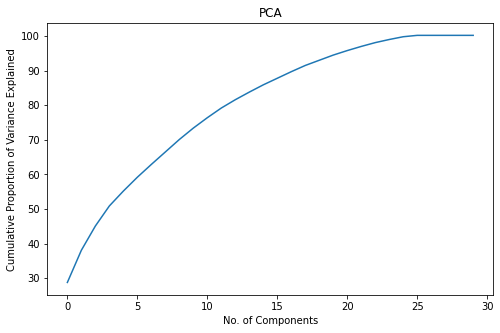

In [1591]:
cumulative_var = np.cumsum(np.around(pca_varianza, 3)*100)
plt.figure(figsize=(8,5))
plt.plot(cumulative_var)
plt.xlabel("No. of Components")
plt.title("PCA")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

In [1592]:
#ELEGIMOS DE 21 A 23 DIMESIONES A REDUCIR EN ESTE CASO 21
pca = PCA(n_components=21)
nuevas_dimimensiones = pca.fit_transform(df_limpio_stan)
nuevas_dimimensiones = pd.DataFrame(data = nuevas_dimimensiones,columns = ['PC1','PC2','PC3',"PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20","PC21"])


In [1593]:
nuevas_dimimensiones=pd.DataFrame(nuevas_dimimensiones)
nuevas_dimimensiones.info()

#esta reduccion nos perimte aligerar calculos en caso de que queramos, pero no visualizar datos dado que con 3 dimesiones apenas tenemos el 50 % de la informacion  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     2203 non-null   float64
 1   PC2     2203 non-null   float64
 2   PC3     2203 non-null   float64
 3   PC4     2203 non-null   float64
 4   PC5     2203 non-null   float64
 5   PC6     2203 non-null   float64
 6   PC7     2203 non-null   float64
 7   PC8     2203 non-null   float64
 8   PC9     2203 non-null   float64
 9   PC10    2203 non-null   float64
 10  PC11    2203 non-null   float64
 11  PC12    2203 non-null   float64
 12  PC13    2203 non-null   float64
 13  PC14    2203 non-null   float64
 14  PC15    2203 non-null   float64
 15  PC16    2203 non-null   float64
 16  PC17    2203 non-null   float64
 17  PC18    2203 non-null   float64
 18  PC19    2203 non-null   float64
 19  PC20    2203 non-null   float64
 20  PC21    2203 non-null   float64
dtypes: float64(21)
memory usage: 361.6 KB

In [1594]:
np.sum(pca_varianza[:21])

0.9564590804877628

In [1595]:
#la pca no permite representar con certeza en tres diemesiones,por lo que usaremos umap  dado que si una tecnica linal no te permite visualizar es más probable que una no lineal si pueda 

In [1596]:
W=1000
H=800
def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            colorscale='Rainbow',
             
            opacity=1,
            line_width=1
        )
    )])
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=W,height=H)
    fig.show()

In [1597]:
#reducimos la dimensiones con UMAP para mejorar la interpretabilidad 
UmAp = umap.UMAP(n_neighbors=4,metric='correlation',n_components=3)
embedding_=UmAp.fit(df_limpio_stan)

In [1598]:
plot_3d(UmAp.embedding_[:,0],UmAp.embedding_[:,1],UmAp.embedding_[:,2])

In [1599]:
#nos da una idea que pueden existir minimo 5 cluster grandes y 9+- contando los pequeños 

##Clusiterización kmeans

In [1600]:
#Cambiamos la variable para evistar errores
df_limpio_kmedias=df_limpio_stan
df_limpio_kmedias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Education                     2203 non-null   float64
 1   Marital_Status                2203 non-null   float64
 2   ingresos_anuales_hogar        2203 non-null   float64
 3   Kidhome                       2203 non-null   float64
 4   Teenhome                      2203 non-null   float64
 5   Dias_desde_ultima_compra      2203 non-null   float64
 6   Mnt_Wine                      2203 non-null   float64
 7   MntFruits                     2203 non-null   float64
 8   MntMeatProducts               2203 non-null   float64
 9   MntFishProducts               2203 non-null   float64
 10  MntSweetProducts              2203 non-null   float64
 11  MntGoldProds                  2203 non-null   float64
 12  compras_en_descuento          2203 non-null   float64
 13  com

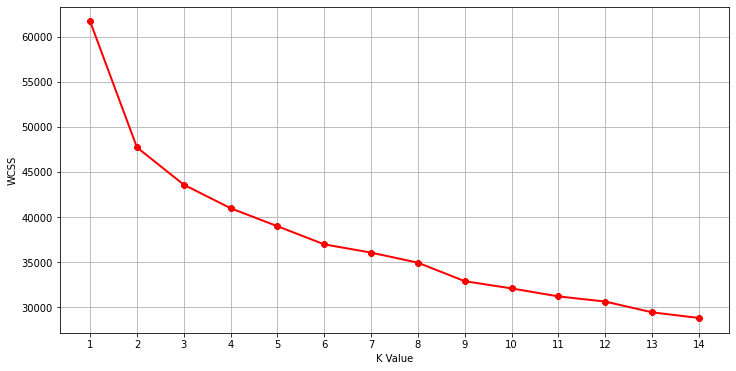

In [1601]:
#kmeans 
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init="k-means++",  random_state=10)
    kmeans.fit(df_limpio_kmedias)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

In [1602]:
#A primera vista el numero perfecto de cluster estaria entre los 7 y 10
#para afinar mas usaremos el metodo Silhoutte 

In [1603]:
##Silhoutte score

For n_clusters = 2 The average silhouette_score is : 0.24656123066366475
For n_clusters = 3 The average silhouette_score is : 0.17734343641578218
For n_clusters = 4 The average silhouette_score is : 0.17794057355779044
For n_clusters = 5 The average silhouette_score is : 0.1824831746351564
For n_clusters = 6 The average silhouette_score is : 0.11649969614465248
For n_clusters = 7 The average silhouette_score is : 0.10305236319001768
For n_clusters = 8 The average silhouette_score is : 0.11522766959023122
For n_clusters = 9 The average silhouette_score is : 0.12107247174966054
For n_clusters = 10 The average silhouette_score is : 0.11835547784446158


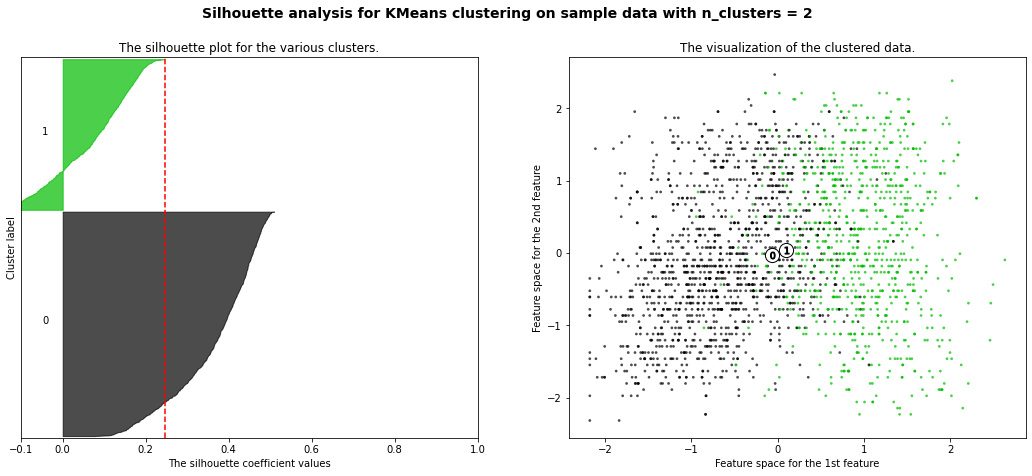

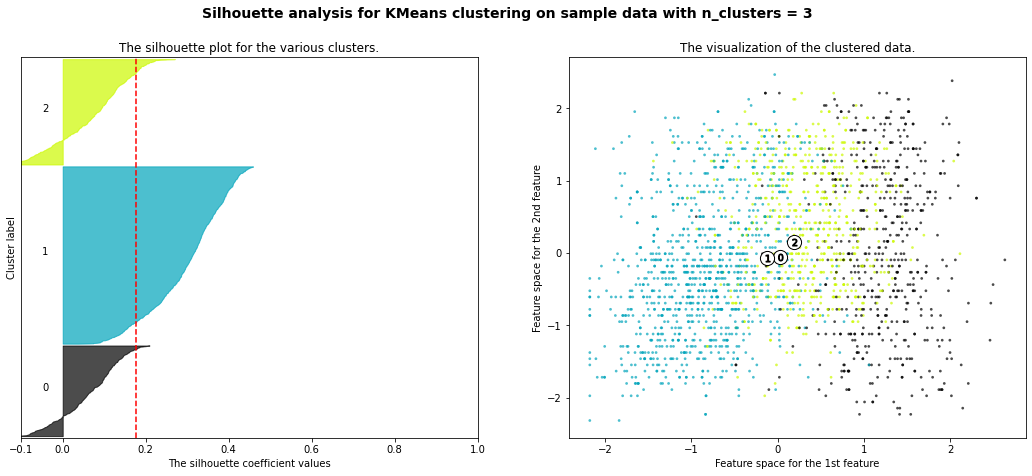

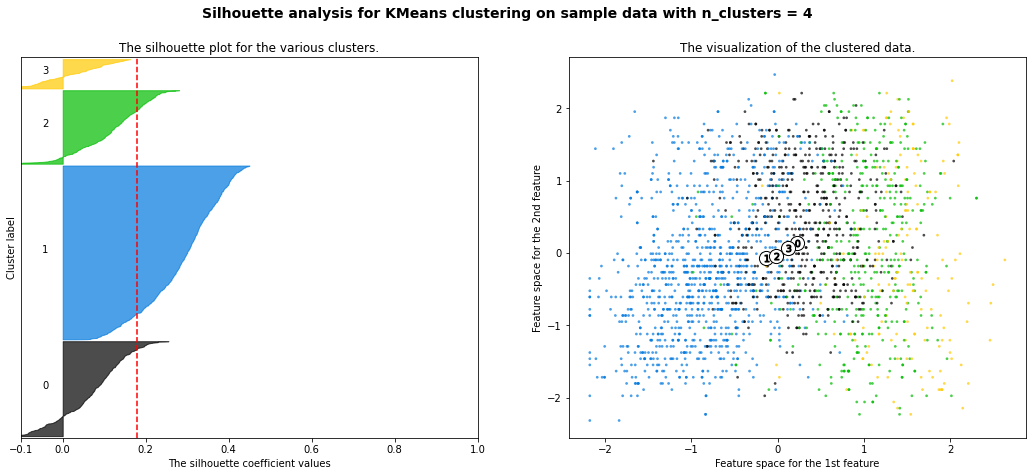

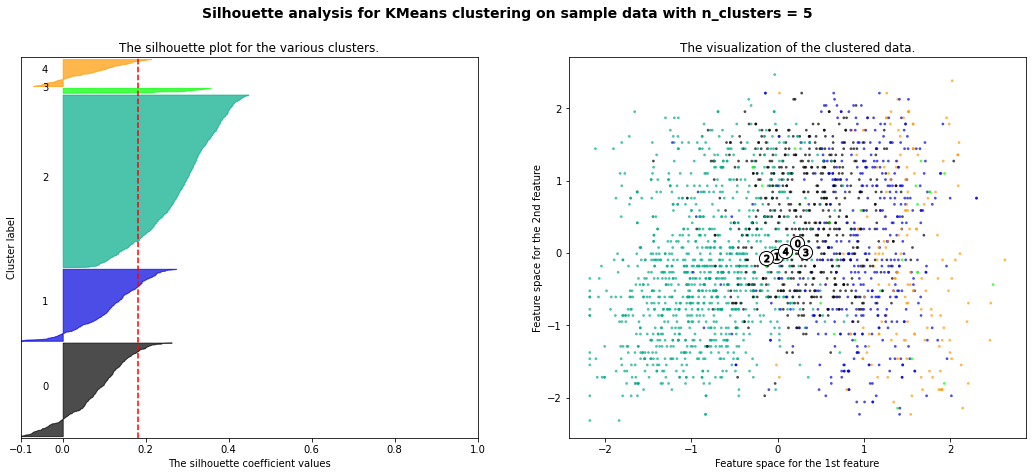

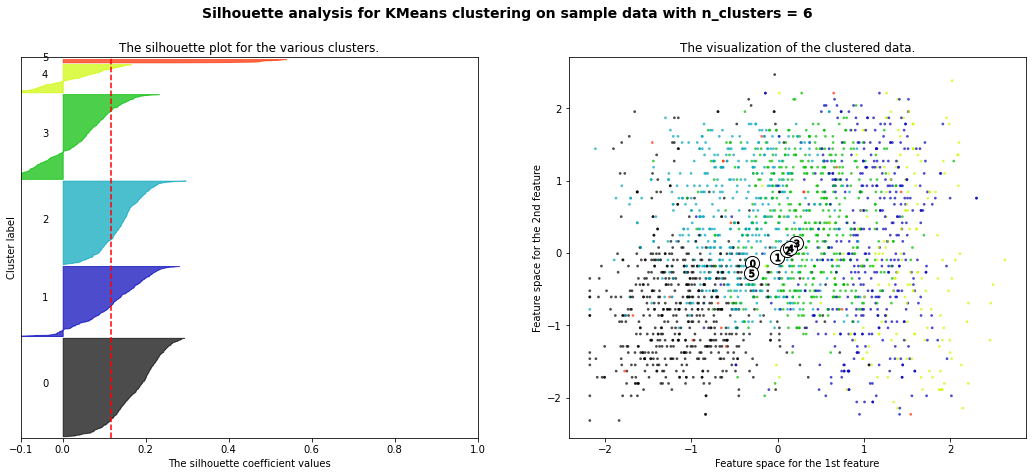

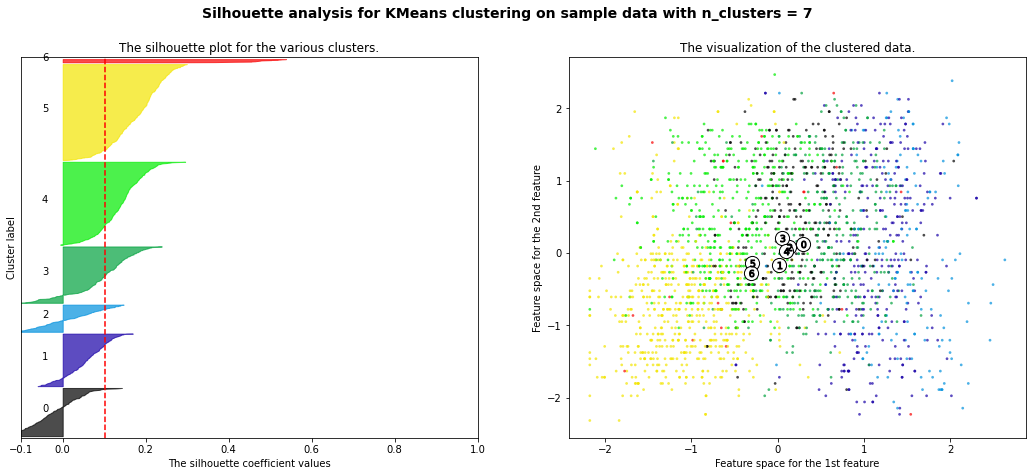

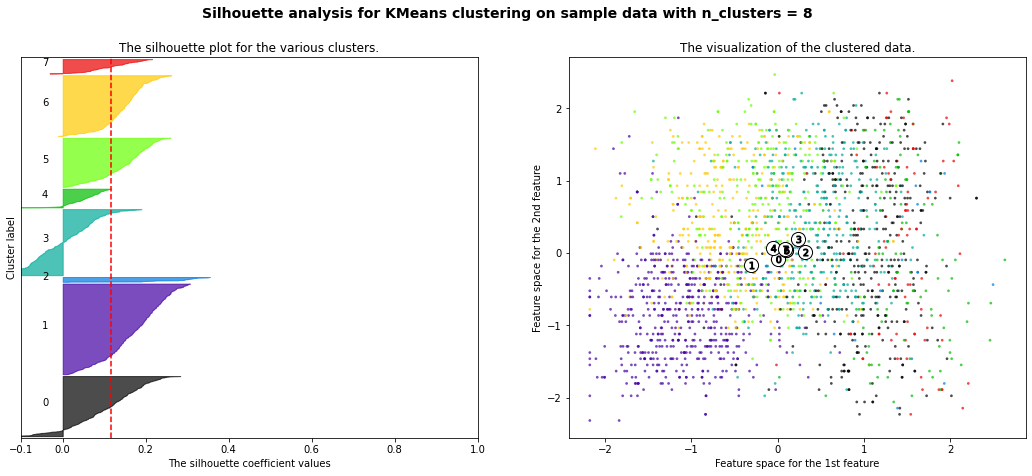

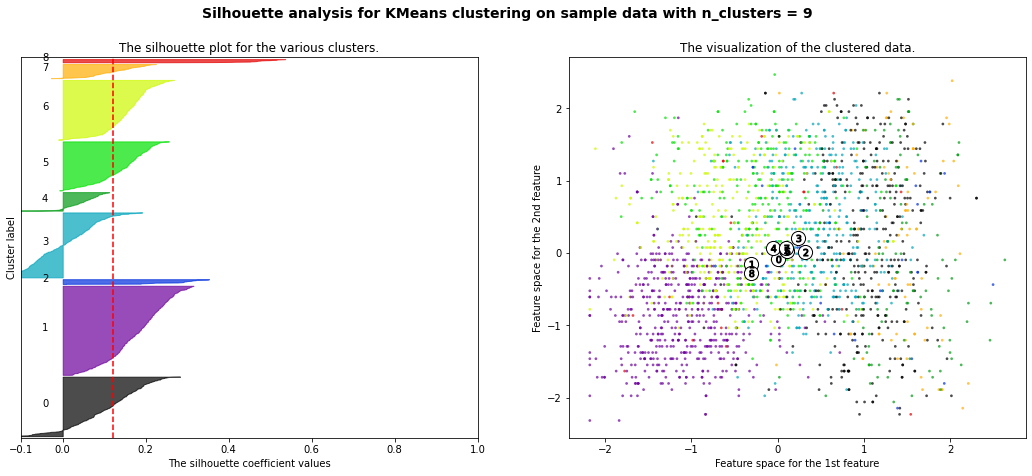

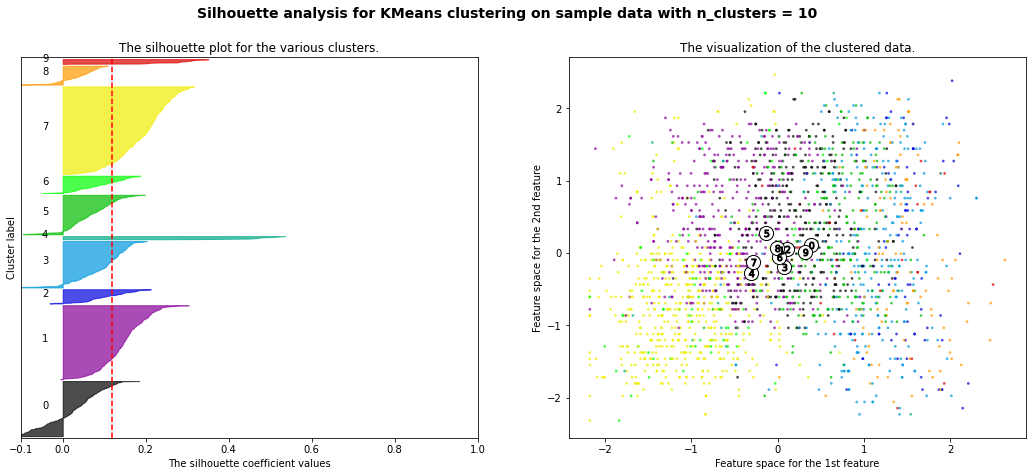

In [1604]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_limpio_kmedias) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_limpio_kmedias)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_limpio_kmedias, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_limpio_kmedias, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_limpio_kmedias['ingresos_anuales_hogar'], df_limpio_kmedias['Age'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [1605]:
#For n_clusters = 8 The average silhouette_score is : 0.11495998382166889
#vemos que en ocho hay un codo 

In [1606]:
km = KMeans(n_clusters=8, random_state=10)
cluster_kmedia = km.fit_predict(df_limpio_stan)
df_limpio_kmedias["KMeans_cluster"] = cluster_kmedia
df_limpio["KMeans_cluster"] = cluster_kmedia
df_limpio_kmedias

,Education,Marital_Status,ingresos_anuales_hogar,Kidhome,Teenhome,Dias_desde_ultima_compra,Mnt_Wine,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,aceptó_oferta_última_campaña,antiguedad_cliente_en_crm,Age,Mnt_adult_prod,Children_numero_total,KMeans_cluster
0,-0.423518,-1.409226,0.308104,-0.821969,-0.930712,0.304618,0.972710,1.539149,1.768112,2.452351,...,-0.117498,-0.095717,0.0,0.0,2.369729,1.507714,1.015334,1.032212,-1.264933,0
1,-0.423518,-1.409226,-0.271013,1.037167,0.906527,-0.387603,-0.875547,-0.640428,-0.737706,-0.654904,...,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,1.271591,-0.923246,1.401716,6
2,-0.423518,-0.464165,0.969763,-0.821969,-0.930712,-0.802935,0.353662,0.562097,-0.176217,1.337395,...,-0.117498,-0.095717,0.0,0.0,-0.421989,0.044501,0.331982,0.325920,-1.264933,0
3,-0.423518,-0.464165,-1.238237,1.037167,-0.930712,-0.802935,-0.875547,-0.565270,-0.672741,-0.508680,...,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,-1.290978,-0.926016,0.068391,1
4,1.792657,0.480896,0.315715,1.037167,-0.930712,1.550615,-0.395711,0.411782,-0.217981,0.149327,...,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,-1.034721,-0.449616,0.068391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,-0.423518,0.480896,0.459586,-0.821969,0.906527,-0.110714,1.191894,0.411782,0.079005,0.076215,...,-0.117498,-0.095717,0.0,0.0,-0.421989,0.044501,0.161144,1.677568,0.068391,3
2199,1.792657,-0.464165,0.596632,2.896303,0.906527,0.235396,0.294423,-0.665481,-0.626337,-0.691460,...,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,1.954943,0.176353,2.735040,6
2200,-0.423518,1.425957,0.251293,-0.821969,-0.930712,1.446781,1.781322,0.537045,0.241419,-0.106565,...,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,-1.034721,1.611094,-1.264933,3
2201,-0.423518,-0.464165,0.853488,-0.821969,0.906527,-1.425933,0.359586,0.086098,0.227498,0.770778,...,-0.117498,-0.095717,0.0,0.0,-0.421989,-1.418712,1.100753,0.384085,0.068391,3


In [1607]:
np.unique(cluster_kmedia)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

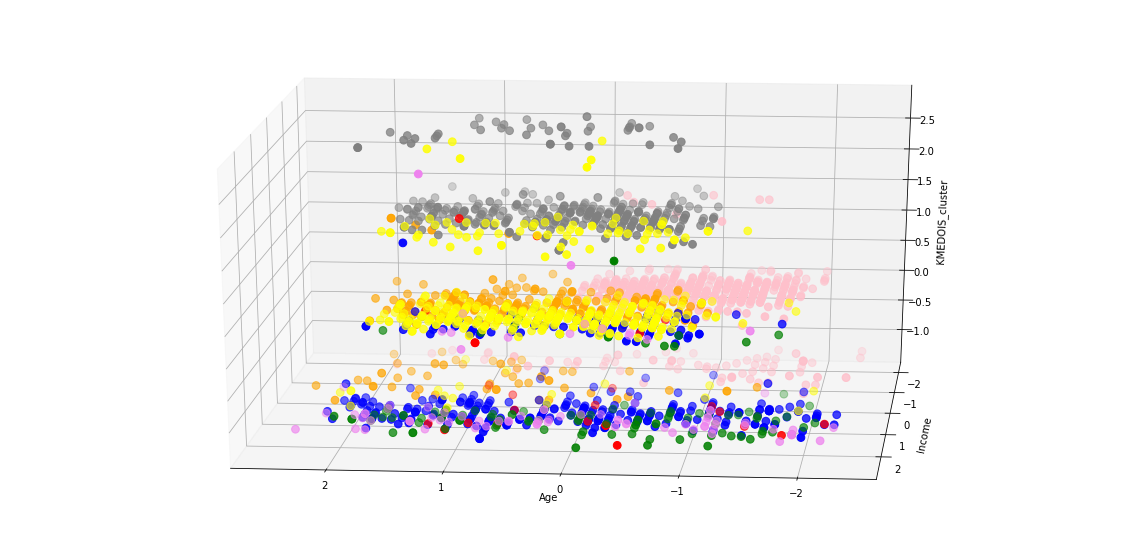

In [1608]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_limpio_kmedias.Age[df_limpio_kmedias.KMeans_cluster == 0], df_limpio_kmedias["ingresos_anuales_hogar"][df_limpio_kmedias.KMeans_cluster == 0], df_limpio_kmedias["Children_numero_total"][df_limpio_kmedias.KMeans_cluster == 0], c='blue', s=60)
ax.scatter(df_limpio_kmedias.Age[df_limpio_kmedias.KMeans_cluster == 1], df_limpio_kmedias["ingresos_anuales_hogar"][df_limpio_kmedias.KMeans_cluster == 1], df_limpio_kmedias["Children_numero_total"][df_limpio_kmedias.KMeans_cluster == 1], c='pink', s=60)
ax.scatter(df_limpio_kmedias.Age[df_limpio_kmedias.KMeans_cluster == 2], df_limpio_kmedias["ingresos_anuales_hogar"][df_limpio_kmedias.KMeans_cluster == 2], df_limpio_kmedias["Children_numero_total"][df_limpio_kmedias.KMeans_cluster == 2], c='red', s=60)
ax.scatter(df_limpio_kmedias.Age[df_limpio_kmedias.KMeans_cluster == 3], df_limpio_kmedias["ingresos_anuales_hogar"][df_limpio_kmedias.KMeans_cluster == 3], df_limpio_kmedias["Children_numero_total"][df_limpio_kmedias.KMeans_cluster == 3], c='yellow', s=60)
ax.scatter(df_limpio_kmedias.Age[df_limpio_kmedias.KMeans_cluster == 4], df_limpio_kmedias["ingresos_anuales_hogar"][df_limpio_kmedias.KMeans_cluster == 4], df_limpio_kmedias["Children_numero_total"][df_limpio_kmedias.KMeans_cluster == 4], c='green', s=60)
ax.scatter(df_limpio_kmedias.Age[df_limpio_kmedias.KMeans_cluster == 5], df_limpio_kmedias["ingresos_anuales_hogar"][df_limpio_kmedias.KMeans_cluster == 5], df_limpio_kmedias["Children_numero_total"][df_limpio_kmedias.KMeans_cluster == 5], c='orange', s=60)
ax.scatter(df_limpio_kmedias.Age[df_limpio_kmedias.KMeans_cluster == 6], df_limpio_kmedias["ingresos_anuales_hogar"][df_limpio_kmedias.KMeans_cluster == 6], df_limpio_kmedias["Children_numero_total"][df_limpio_kmedias.KMeans_cluster == 6], c='grey', s=60)
ax.scatter(df_limpio_kmedias.Age[df_limpio_kmedias.KMeans_cluster == 7], df_limpio_kmedias["ingresos_anuales_hogar"][df_limpio_kmedias.KMeans_cluster == 7], df_limpio_kmedias["Children_numero_total"][df_limpio_kmedias.KMeans_cluster == 7], c='violet', s=60)

ax.view_init(20,95)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('KMEDOIS_cluster')
plt.show()

In [1609]:
df_limpio

,Education,Marital_Status,ingresos_anuales_hogar,Kidhome,Teenhome,Dias_desde_ultima_compra,Mnt_Wine,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,aceptó_oferta_última_campaña,antiguedad_cliente_en_crm,Age,Mnt_adult_prod,Children_numero_total,KMeans_cluster
0,1,1,58138.0,0,0,58,635,88,546,172,...,0,0,3,11,1,10,65,723,0,0
1,1,1,46344.0,1,1,38,11,1,6,2,...,0,0,3,11,0,8,68,17,2,6
2,1,2,71613.0,0,0,26,426,49,127,111,...,0,0,3,11,0,9,57,468,0,0
3,1,2,26646.0,1,0,26,11,4,20,10,...,0,0,3,11,0,8,38,16,1,1
4,2,3,58293.0,1,0,94,173,43,118,46,...,0,0,3,11,0,8,41,188,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,3,61223.0,0,1,46,709,43,182,42,...,0,0,3,11,0,9,55,956,1,3
2236,2,2,64014.0,2,1,56,406,0,30,0,...,0,0,3,11,0,8,76,414,3,6
2237,1,4,56981.0,0,0,91,908,48,217,32,...,0,0,3,11,0,8,41,932,0,3
2238,1,2,69245.0,0,1,8,428,30,214,80,...,0,0,3,11,0,8,66,489,1,3


##Reglas de asociación 

In [1610]:
#solo podmeos usar valores binarios 

#vamos convertir con aolgun tipo de codificacion algunas categorias que me parecen interesantes para la interpretacion de negocio

In [1611]:
df_limpio.head(1)

,Education,Marital_Status,ingresos_anuales_hogar,Kidhome,Teenhome,Dias_desde_ultima_compra,Mnt_Wine,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,aceptó_oferta_última_campaña,antiguedad_cliente_en_crm,Age,Mnt_adult_prod,Children_numero_total,KMeans_cluster
0,1,1,58138.0,0,0,58,635,88,546,172,...,0,0,3,11,1,10,65,723,0,0


In [1612]:
df_binarios=df_limpio[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',"aceptó_oferta_última_campaña",'Complain','Kidhome']]

(array([ 72., 211., 315., 344., 322., 322., 307., 234.,  67.,   9.]),
 array([  7500. ,  17297.1,  27094.2,  36891.3,  46688.4,  56485.5,
         66282.6,  76079.7,  85876.8,  95673.9, 105471. ]),
 <a list of 10 Patch objects>)

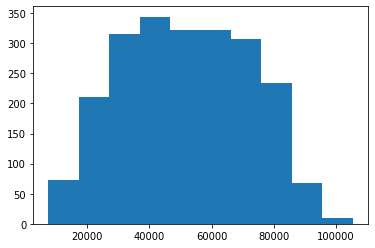

In [1613]:
plt.hist(df_limpio['ingresos_anuales_hogar'])

In [1614]:
#la funcion te crea intervalor y reemplaza los valores
def binarizar_valores(valor):
  bi=""
  if  valor <= 18000:
    bi="minimo"
  if valor > 18000 and valor <= 27000:
    bi="27"
  if valor > 27000 and valor <= 40000:
    bi="40" 
  if valor > 40000 and valor <= 60000:
    bi="60"
  if valor > 60000 and valor <= 80000:
    bi="80"
  elif valor > 80000:
    bi="90"
  return bi

df_apanhos=df_limpio
df_apanhos = df_apanhos.sort_values('ingresos_anuales_hogar')
df_apanhos=df_apanhos.assign(ingresos_anuales_hogar_binario = lambda dataset: dataset.ingresos_anuales_hogar.apply( lambda dataset : binarizar_valores(dataset)))


#esta variable si 1= ingresos_anuales_hogar menos que 18000  si no =0
df_binarios['ingresos_anuales_hogar_menos_que_18000']=df_apanhos['ingresos_anuales_hogar_binario'].astype(str)
df_binarios['ingresos_anuales_hogar_menos_que_18000']=df_binarios['ingresos_anuales_hogar_menos_que_18000'].map({"minimo":1,"27":0,"40":0,"60":0,"80":0,"90":0})
#esta variable si 1= ingresos_anuales_hogar menos que 27000  si no =0
df_binarios['ingresos_anuales_hogar_menos_que_27000']=df_apanhos['ingresos_anuales_hogar_binario'].astype(str)
df_binarios['ingresos_anuales_hogar_menos_que_27000']=df_binarios['ingresos_anuales_hogar_menos_que_27000'].map({"minimo":0,"27":1,"40":0,"60":0,"80":0,"90":0})
#esta variable si 1= ingresos_anuales_hogar menos que 40000  si no =0
df_binarios['ingresos_anuales_hogar_menos_que_40000']=df_apanhos['ingresos_anuales_hogar_binario'].astype(str)
df_binarios['ingresos_anuales_hogar_menos_que_40000']=df_binarios['ingresos_anuales_hogar_menos_que_40000'].map({"minimo":0,"27":0,"40":1,"60":0,"80":0,"90":0})
#esta variable si 1= ingresos_anuales_hogar menos que 60000  si no =0
df_binarios['ingresos_anuales_hogar_menos_que_60000']=df_apanhos['ingresos_anuales_hogar_binario'].astype(str)
df_binarios['ingresos_anuales_hogar_menos_que_60000']=df_binarios['ingresos_anuales_hogar_menos_que_60000'].map({"minimo":0,"27":0,"40":0,"60":1,"80":0,"90":0})
#esta variable si 1= ingresos_anuales_hogar menos que 80000  si no =0
df_binarios['ingresos_anuales_hogar_menos_que_80000']=df_apanhos['ingresos_anuales_hogar_binario'].astype(str)
df_binarios['ingresos_anuales_hogar_menos_que_80000']=df_binarios['ingresos_anuales_hogar_menos_que_80000'].map({"minimo":0,"27":0,"40":0,"60":0,"80":1,"90":0})
#esta variable si 1= ingresos_anuales_hogar menos que 18000  si no =0
df_binarios['ingresos_anuales_hogar_mas_de_80000']=df_apanhos['ingresos_anuales_hogar_binario'].astype(str)
df_binarios['ingresos_anuales_hogar_mas_de_80000']=df_binarios['ingresos_anuales_hogar_mas_de_80000'].map({"minimo":0,"27":0,"40":0,"60":0,"80":0,"90":1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [1615]:
#esta variable si 1= antiguedad_cliente_en_crm =8  si no =0
df_binarios['antiguedad_cliente_8_anhos']=df_limpio['antiguedad_cliente_en_crm'].astype(str)
df_binarios['antiguedad_cliente_8_anhos']=df_binarios['antiguedad_cliente_8_anhos'].map({"8":1,"9":0,"10":0})
np.unique(df_binarios['antiguedad_cliente_8_anhos'])
#esta variable si 1= antiguedad_cliente_en_crm =9  si no =0
df_binarios['antiguedad_cliente_9_anhos']=df_limpio['antiguedad_cliente_en_crm'].astype(str)
df_binarios['antiguedad_cliente_9_anhos']=df_binarios['antiguedad_cliente_9_anhos'].map({"8":0,"9":1,"10":0})
np.unique(df_binarios['antiguedad_cliente_9_anhos'])
#esta variable si 1= antiguedad_cliente_en_crm =10  si no =0
df_binarios['antiguedad_cliente_10_anhos']=df_limpio['antiguedad_cliente_en_crm'].astype(str)
df_binarios['antiguedad_cliente_10_anhos']=df_binarios['antiguedad_cliente_10_anhos'].map({"8":0,"9":0,"10":1})
np.unique(df_binarios['antiguedad_cliente_10_anhos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

array([0, 1])

In [1616]:
#esta variable te dice si compro o no en decuento mas de 3 vez si 1= mas de 3 compra en decuento si no =0
df_binarios['mas_de_3_compras_en_descuento']=df_limpio['compras_en_descuento'].astype(str)
df_binarios['mas_de_3_compras_en_descuento']=df_binarios['mas_de_3_compras_en_descuento'].map({"0":0,"1":0,"2":0,"3":0,"4":1,"5":1,"6":1,"7":1,"8":1,"9":1,"10":1,"11":1})
np.unique(df_binarios['mas_de_3_compras_en_descuento'])
#esta variable te dice si compro o no en decuento mas de 3 vez si 1= menos de 3 compra en decuento si no =0
df_binarios['menos_de_3_compras_en_descuento']=df_limpio['compras_en_descuento'].astype(str)
df_binarios["menos_de_3_compras_en_descuento"]=df_binarios['menos_de_3_compras_en_descuento'].map({"0":1,"1":1,"2":1,"3":1,"4":0,"5":0,"6":0,"7":0,"8":0,"9":0,"10":0,"11":0})
np.unique(df_binarios["menos_de_3_compras_en_descuento"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

array([0, 1])

In [1617]:
#esta variable  si 1= con doctorado  si no =0
df_binarios['doctorado']=df_limpio['Education'].astype(str)
df_binarios['doctorado']=df_binarios['doctorado'].map({"0":0,"1":0,"2":1})
np.unique(df_binarios['doctorado'])
#esta variable  si 1= no doctorado  si no =0
df_binarios['no_doctorado']=df_limpio['Education'].astype(str)
df_binarios['no_doctorado']=df_binarios['no_doctorado'].map({"0":1,"1":1,"2":0})
np.unique(df_binarios['no_doctorado'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

array([0, 1])

In [1618]:
#esta variable  si 1= en pareja si no =0
df_binarios['en_pareja']=df_limpio['Marital_Status'].astype(str)
df_binarios['en_pareja']=df_binarios['en_pareja'].map({"1":0,"2":1,"3":1,"4":0,"5":0,"6":0})
np.unique(df_binarios['en_pareja'])
#esta variable  si 1= sin pareja si no =0
df_binarios['sin_pareja']=df_limpio['Marital_Status'].astype(str)
df_binarios['sin_pareja']=df_binarios['sin_pareja'].map({"1":1,"2":0,"3":0,"4":1,"5":1,"6":1})
np.unique(df_binarios['sin_pareja'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

array([0, 1])

In [1619]:
#esta varibable te da si 1=tinee hijos  si no =0
df_binarios['Kidhome']=df_1['Kidhome'].astype(str)
df_binarios['Kidhome']=df_binarios['Kidhome'].map({"0":0,"1":1,"2":1})
np.unique(df_binarios['Kidhome'])
#esta varibable te da si 1=no tinee hijos  si no =0
df_binarios['no_Kidhome']=df_1['Kidhome'].astype(str)
df_binarios['no_Kidhome']=df_binarios['no_Kidhome'].map({"0":1,"1":0,"2":0})
np.unique(df_binarios['no_Kidhome'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

array([0, 1])

In [1620]:
#esta variable  si  1= en el cluster 0  si no =0

df_binarios['KMeans_cluster_0']=df_limpio['KMeans_cluster'].astype(str)
df_binarios['KMeans_cluster_0']=df_binarios['KMeans_cluster_0'].map({"0":1,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0})
np.unique(df_binarios['KMeans_cluster_0'])
#esta variable  si  1= en el cluster 1  si no =0

df_binarios['KMeans_cluster_1']=df_limpio['KMeans_cluster'].astype(str)
df_binarios['KMeans_cluster_1']=df_binarios['KMeans_cluster_1'].map({"0":0,"1":1,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0})
np.unique(df_binarios['KMeans_cluster_1'])

#esta variable  si  1= en el cluster 2  si no =0

df_binarios['KMeans_cluster_2']=df_limpio['KMeans_cluster'].astype(str)
df_binarios['KMeans_cluster_2']=df_binarios['KMeans_cluster_2'].map({"0":0,"1":0,"2":1,"3":0,"4":0,"5":0,"6":0,"7":0})
np.unique(df_binarios['KMeans_cluster_2'])

#esta variable  si  1= en el cluster 3 si no =0

df_binarios['KMeans_cluster_3']=df_limpio['KMeans_cluster'].astype(str)
df_binarios['KMeans_cluster_3']=df_binarios['KMeans_cluster_3'].map({"0":0,"1":0,"2":0,"3":1,"4":0,"5":0,"6":0,"7":0})
np.unique(df_binarios['KMeans_cluster_3'])

#esta variable  si  1= en el cluster 4  si no =0

df_binarios['KMeans_cluster_4']=df_limpio['KMeans_cluster'].astype(str)
df_binarios['KMeans_cluster_4']=df_binarios['KMeans_cluster_4'].map({"0":0,"1":0,"2":0,"3":0,"4":1,"5":0,"6":0,"7":0})
np.unique(df_binarios['KMeans_cluster_4'])
#esta variable  si  1= en el cluster 5  si no =0

df_binarios['KMeans_cluster_5']=df_limpio['KMeans_cluster'].astype(str)
df_binarios['KMeans_cluster_5']=df_binarios['KMeans_cluster_5'].map({"0":0,"1":0,"2":0,"3":0,"4":0,"5":1,"6":0,"7":0})
np.unique(df_binarios['KMeans_cluster_5'])
#esta variable  si  1= en el cluster 6  si no =0

df_binarios['KMeans_cluster_6']=df_limpio['KMeans_cluster'].astype(str)
df_binarios['KMeans_cluster_6']=df_binarios['KMeans_cluster_6'].map({"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":1,"7":0})
np.unique(df_binarios['KMeans_cluster_6'])
#esta variable  si  1= en el cluster 7  si no =0

df_binarios['KMeans_cluster_7']=df_limpio['KMeans_cluster'].astype(str)
df_binarios['KMeans_cluster_7']=df_binarios['KMeans_cluster_7'].map({"0":0,"1":0,"2":0,"3":0,"4":0,"5":1,"6":0,"7":1})
np.unique(df_binarios['KMeans_cluster_7'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

array([0, 1])

In [1621]:
df_binarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   AcceptedCmp3                            2203 non-null   int64
 1   AcceptedCmp4                            2203 non-null   int64
 2   AcceptedCmp5                            2203 non-null   int64
 3   AcceptedCmp1                            2203 non-null   int64
 4   AcceptedCmp2                            2203 non-null   int64
 5   aceptó_oferta_última_campaña            2203 non-null   int64
 6   Complain                                2203 non-null   int64
 7   Kidhome                                 2203 non-null   int64
 8   ingresos_anuales_hogar_menos_que_18000  2203 non-null   int64
 9   ingresos_anuales_hogar_menos_que_27000  2203 non-null   int64
 10  ingresos_anuales_hogar_menos_que_40000  2203 non-null   int64
 11  ingresos_anuales_

In [1622]:
frecuentes  = apriori(df_binarios, min_support=0.001, use_colnames=True)
print(len(frecuentes))
frecuentes.head(2)

32240


,support,itemsets
0,0.073536,(AcceptedCmp3)
1,0.075352,(AcceptedCmp4)


In [1626]:
reglas = association_rules(frecuentes, metric='lift', min_threshold=1)
reglas=reglas.drop(columns=["leverage","conviction","antecedent support","consequent support"])
reglas=reglas.sort_values(["confidence", "lift","support"], ascending=False)
reglas

,antecedents,consequents,support,confidence,lift
786902,"(antiguedad_cliente_8_anhos, en_pareja, aceptó...","(no_doctorado, AcceptedCmp3, AcceptedCmp2)",0.001362,1.000000,550.750000
786905,"(antiguedad_cliente_8_anhos, en_pareja, aceptó...","(no_doctorado, AcceptedCmp3, KMeans_cluster_2)",0.001362,1.000000,550.750000
1302379,"(antiguedad_cliente_8_anhos, en_pareja, aceptó...","(AcceptedCmp5, AcceptedCmp3, AcceptedCmp2, men...",0.001362,1.000000,550.750000
1302390,"(antiguedad_cliente_8_anhos, en_pareja, aceptó...","(AcceptedCmp5, AcceptedCmp3, KMeans_cluster_2,...",0.001362,1.000000,550.750000
1303115,"(en_pareja, KMeans_cluster_2, aceptó_oferta_úl...","(no_doctorado, AcceptedCmp3, AcceptedCmp2)",0.001362,1.000000,550.750000
...,...,...,...,...,...
2025975,(menos_de_3_compras_en_descuento),"(doctorado, en_pareja, KMeans_cluster_4, acept...",0.001362,0.001676,1.230726
2028017,(menos_de_3_compras_en_descuento),"(no_doctorado, KMeans_cluster_2, AcceptedCmp4,...",0.001362,0.001676,1.230726
2030061,(menos_de_3_compras_en_descuento),"(en_pareja, KMeans_cluster_2, AcceptedCmp4, ac...",0.001362,0.001676,1.230726
2032105,(menos_de_3_compras_en_descuento),"(no_doctorado, KMeans_cluster_2, AcceptedCmp4,...",0.001362,0.001676,1.230726


In [1624]:
#Como podemos observar a parti se este Dataframe los de negocio podran sacar conclusiones faciles y intuitivas sobre los  cluster, atra ves de las reglas que relaciona un cluster con su antecedents o	consequents